# **Setup**

In [ ]:
!pip install pennylane

In [ ]:
pip install pennylane-qiskit

In [ ]:
pip install pennylane-cirq

In [ ]:
pip install pennylane-forest

In [ ]:
pip install pyquil

In [ ]:
 pip install ruamel.yaml

In [ ]:
pip install git+https://github.com/rigetti/pennylane-forest.git

  Cloning https://github.com/rigetti/pennylane-forest.git to /tmp/pip-req-build-r3y0072v
  Running command git clone -q https://github.com/rigetti/pennylane-forest.git /tmp/pip-req-build-r3y0072v
  Cloning https://github.com/PennyLaneAI/pennylane.git (to revision master) to /tmp/pip-install-0sms08t4/pennylane_14686eb20684406596dae163dce6a8f8
  Running command git clone -q https://github.com/PennyLaneAI/pennylane.git /tmp/pip-install-0sms08t4/pennylane_14686eb20684406596dae163dce6a8f8
     |████████████████████████████████| 200 kB 15.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for PennyLane-Forest: filename=PennyLane_Forest-0.17.0-py3-none-any.whl size=26949 sha256=3aa58af5d560de43f57a03e1b139221fbc92666d7c1e6e78f4127605cd3a0424
  Stored in directory: /tmp/pip-ephem-wheel-cache-2ugdl5ef/wheels/05/63/81/f589044f76af0cb4daa5a9e5defaac64fc4fc5c3e573efb7ea
  Created wheel for pennylane:

In [ ]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import RandomLayers
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import pennylane as qml
import sklearn.datasets
import sklearn.decomposition
import torch
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Notebook used :https://pennylane.ai/qml/demos/tutorial_ensemble_multi_qpu.html

# **Setting of the main hyper-parameters of the model**

In [ ]:
n_epochs = 30   # Number of optimization epochs
n_layers = 1    # Number of random layers
n_train = 50   # Size of the train dataset
n_test = 30    # Size of the test dataset

SAVE_PATH =  "/content/drive/MyDrive/Qintern/quanvolution/" # Data saving folder. Create folder with this name in files tab of colab.
PREPROCESS = True           # If False, skip quantum processing and load data from SAVE_PATH
np.random.seed(0)           # Seed for NumPy random number generator
tf.random.set_seed(0)       # Seed for TensorFlow random number generator

# **Loading of the CIFAR10 dataset**

In [ ]:
cifar10_dataset = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10_dataset.load_data()

# Reduce dataset size
train_images = train_images[:n_train]
train_labels = train_labels[:n_train]
test_images = test_images[:n_test]
test_labels = test_labels[:n_test]

# Normalize pixel values within 0 and 1
train_images = train_images / 255
test_images = test_images / 255

In [ ]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)
print(train_labels)


(50, 32, 32, 3)
(50, 1)
(30, 32, 32, 3)
(30, 1)
[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]
 [4]
 [7]
 [7]
 [2]
 [9]
 [9]
 [9]
 [3]
 [2]
 [6]
 [4]
 [3]
 [6]
 [6]
 [2]
 [6]
 [3]
 [5]
 [4]
 [0]
 [0]
 [9]
 [1]
 [3]
 [4]
 [0]
 [3]
 [7]
 [3]
 [3]
 [5]
 [2]
 [2]
 [7]
 [1]
 [1]
 [1]
 [2]
 [2]
 [0]]


# **Train_images**

In [ ]:
train_images= tf.image.rgb_to_grayscale(train_images)

In [ ]:
train_images=tf.image.resize(train_images, [4,4])

In [ ]:
train_images.shape

TensorShape([50, 4, 4, 1])

In [ ]:
print(train_images)

tf.Tensor(
[[[[0.3198312 ]
   [0.31110334]
   [0.36866   ]
   [0.35138166]]

  [[0.42248994]
   [0.46491054]
   [0.5830338 ]
   [0.39712912]]

  [[0.3776957 ]
   [0.5735027 ]
   [0.43730474]
   [0.32515883]]

  [[0.45607552]
   [0.40536475]
   [0.4329126 ]
   [0.520121  ]]]


 [[[0.68178594]
   [0.6094276 ]
   [0.7007469 ]
   [0.34035316]]

  [[0.52385134]
   [0.5778806 ]
   [0.85462934]
   [0.54424953]]

  [[0.31732953]
   [0.46292984]
   [0.75293267]
   [0.72628576]]

  [[0.31487364]
   [0.46560955]
   [0.24327983]
   [0.17532325]]]


 [[[0.99990004]
   [0.99990004]
   [0.6158812 ]
   [0.99990004]]

  [[0.8192512 ]
   [0.8273669 ]
   [0.2718061 ]
   [0.6202409 ]]

  [[0.30415052]
   [0.2750522 ]
   [0.1899899 ]
   [0.16230717]]

  [[0.38927326]
   [0.31050813]
   [0.29437327]
   [0.27015433]]]


 [[[0.28533903]
   [0.32132944]
   [0.29952592]
   [0.3178768 ]]

  [[0.32812196]
   [0.2530505 ]
   [0.34288436]
   [0.323846  ]]

  [[0.39912984]
   [0.76242614]
   [0.26851088]
   [0.38392

In [ ]:
len(train_images)

50

In [ ]:
train_images=np.array((train_images),dtype="float64").reshape(50,16)

In [ ]:
train_images.shape

(50, 16)

In [ ]:
train_images

array([[0.31983119, 0.31110334, 0.36866   , 0.35138166, 0.42248994,
        0.46491054, 0.5830338 , 0.39712912, 0.37769571, 0.57350272,
        0.43730474, 0.32515883, 0.45607552, 0.40536475, 0.43291259,
        0.52012098],
       [0.68178594, 0.60942757, 0.70074689, 0.34035316, 0.52385134,
        0.57788062, 0.85462934, 0.54424953, 0.31732953, 0.46292984,
        0.75293267, 0.72628576, 0.31487364, 0.46560955, 0.24327983,
        0.17532325],
       [0.99990004, 0.99990004, 0.6158812 , 0.99990004, 0.81925118,
        0.82736689, 0.27180609, 0.62024093, 0.30415052, 0.27505219,
        0.18998989, 0.16230717, 0.38927326, 0.31050813, 0.29437327,
        0.27015433],
       [0.28533903, 0.32132944, 0.29952592, 0.31787679, 0.32812196,
        0.25305051, 0.34288436, 0.32384601, 0.39912984, 0.76242614,
        0.26851088, 0.38392836, 0.28878325, 0.28074199, 0.34002522,
        0.31232697],
       [0.37207198, 0.39055511, 0.66100025, 0.68583083, 0.27034646,
        0.3180812 , 0.32449108, 

# **Train_labels**

In [ ]:
train_labels=np.array(train_labels).reshape(-1,)

In [ ]:
print(train_labels)

[6 9 9 4 1 1 2 7 8 3 4 7 7 2 9 9 9 3 2 6 4 3 6 6 2 6 3 5 4 0 0 9 1 3 4 0 3
 7 3 3 5 2 2 7 1 1 1 2 2 0]


In [ ]:
len(train_labels)

50

# **Test_images**

In [ ]:
test_images= tf.image.rgb_to_grayscale(test_images)

In [ ]:
test_images=tf.image.resize(test_images, [4,4])

In [ ]:
test_images.shape

TensorShape([30, 4, 4, 1])

In [ ]:
test_images=np.array((test_images),dtype="float64").reshape(30,16)

In [ ]:
test_images.shape

(30, 16)

In [ ]:
test_images

array([[0.47801962, 0.65812367, 0.38839352, 0.38643676, 0.66770339,
        0.59297967, 0.6461246 , 0.32625216, 0.69982266, 0.34252042,
        0.38584238, 0.49494588, 0.30350855, 0.34309411, 0.32988316,
        0.40685716],
       [0.92147654, 0.91853565, 0.7798152 , 0.92020321, 0.85197002,
        0.6390363 , 0.86889493, 0.85645932, 0.48380569, 0.5497328 ,
        0.4372409 , 0.42502031, 0.0058501 , 0.00525343, 0.24610472,
        0.57386935],
       [0.70104229, 0.85280144, 0.78838861, 0.94570142, 0.41075277,
        0.47837907, 0.44124734, 0.66730303, 0.54723763, 0.63091058,
        0.63462871, 0.36006352, 0.1563251 , 0.21318816, 0.22013482,
        0.15013981],
       [0.7592777 , 0.60760701, 0.64230227, 0.8098008 , 0.72498596,
        0.76458591, 0.76834857, 0.7956022 , 0.83654237, 0.1960256 ,
        0.24469432, 0.73785573, 0.25120786, 0.22289097, 0.22469461,
        0.24668069],
       [0.33448619, 0.16967422, 0.36342511, 0.40814406, 0.49509698,
        0.45648336, 0.47690001, 

# **Test_labels**

In [ ]:
test_labels=np.array(test_labels).reshape(-1,)

In [ ]:
print(test_labels)

[3 8 8 0 6 6 1 6 3 1 0 9 5 7 9 8 5 7 8 6 7 0 4 9 5 2 4 0 9 6]


In [ ]:
len(test_labels)

30

# **Load data**

In [ ]:
n_features = 2
n_classes = 10
n_samples = 50

In [ ]:
np.random.seed(1967)
x, y = zip(*np.random.permutation(list(zip(train_images, train_labels ))))

pca = sklearn.decomposition.PCA(n_components=n_features)
pca.fit(x)
x = pca.transform(x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [ ]:
x_min = np.min(x, axis=0)
x_max = np.max(x, axis=0)

x = 2 * np.pi * (x - x_min) / (x_max - x_min) - np.pi

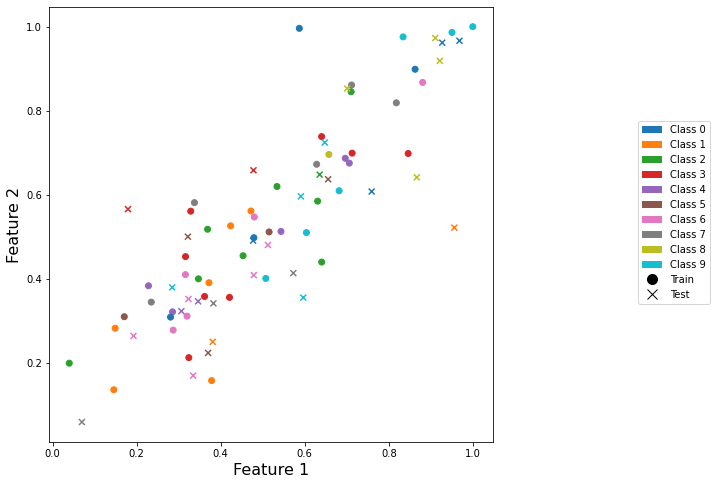

In [ ]:
#colours = ["#ec6f86", "#4573e7", "#ad61ed", "#FF8000", "#00008B", "	#458B00", "	#CD1076", "#8B3A62", "	#FFF68F","	#8B008B"]
colours =  ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


def plot_points(train_images, train_labels, test_images, test_labels):
    c_train = []
    c_test = []

    for y in train_labels:
        c_train.append(colours[y])

    for y in test_labels:
        c_test.append(colours[y])

    plt.scatter(train_images[:, 0], train_images[:, 1], c=c_train)
    plt.scatter(test_images[:, 0], test_images[:, 1], c=c_test, marker="x")

    plt.xlabel("Feature 1", fontsize=16)
    plt.ylabel("Feature 2", fontsize=16)

    ax = plt.gca()
    ax.set_aspect(1)

    c_transparent = "#00000000"

    custom_lines = [
        Patch(facecolor=colours[0], edgecolor=c_transparent, label="Class 0"),
        Patch(facecolor=colours[1], edgecolor=c_transparent, label="Class 1"),
        Patch(facecolor=colours[2], edgecolor=c_transparent, label="Class 2"),
        Patch(facecolor=colours[3], edgecolor=c_transparent, label="Class 3"),
        Patch(facecolor=colours[4], edgecolor=c_transparent, label="Class 4"),
        Patch(facecolor=colours[5], edgecolor=c_transparent, label="Class 5"),
        Patch(facecolor=colours[6], edgecolor=c_transparent, label="Class 6"),
        Patch(facecolor=colours[7], edgecolor=c_transparent, label="Class 7"),
        Patch(facecolor=colours[8], edgecolor=c_transparent, label="Class 8"),
        Patch(facecolor=colours[9], edgecolor=c_transparent, label="Class 9"),



       
        Line2D([0], [0], marker="o", color=c_transparent, label="Train",
               markerfacecolor="black", markersize=10),
        Line2D([0], [0], marker="x", color=c_transparent, label="Test",
               markerfacecolor="black", markersize=10),
    ]

    ax.legend(handles=custom_lines, bbox_to_anchor=(1.5, 0.75))
plt.figure(figsize=(8,8))


plot_points(train_images, train_labels, test_images, test_labels)

# **Experience**

In [ ]:
n_wires = 4
#from pennylane_qiskit import AerDevice

#dev = AerDevice(wires=4)
#dev1 = qml.device("qiskit.aer", wires=4)
#dev0 = qml.device("forest.qvm", device="4q-qvm")

#dev0 =  qml.device('cirq.simulator', wires=4)

dev0 = qml.device('forest.numpy_wavefunction', wires=4)
dev1 = qml.device('qiskit.basicaer', wires=4)
devs = [dev0, dev1]

In [ ]:
def circuit0(params, x=None):
    for i in range(n_wires):
        qml.RX(x[i % n_features], wires=i)
        qml.Rot(*params[1, 0, i], wires=i)

    qml.CZ(wires=[1, 0])
    qml.CZ(wires=[1, 2])
    qml.CZ(wires=[3, 0])

    for i in range(n_wires):
        qml.Rot(*params[1, 1, i], wires=i)
    return qml.expval(qml.PauliZ(0)), qml.expval(qml.PauliZ(1)), qml.expval(qml.PauliZ(2))


def circuit1(params, x=None):
    for i in range(n_wires):
        qml.RX(x[i % n_features], wires=i)
        qml.Rot(*params[0, 0, i], wires=i)

    qml.CZ(wires=[0, 1])
    qml.CZ(wires=[1, 2])
    qml.CZ(wires=[1, 3])

    for i in range(n_wires):
        qml.Rot(*params[0, 1, i], wires=i)
    return qml.expval(qml.PauliZ(0)), qml.expval(qml.PauliZ(1)), qml.expval(qml.PauliZ(2))

In [ ]:
qnodes = qml.QNodeCollection(
    [qml.QNode(circuit0, dev0, interface="torch"),
     qml.QNode(circuit1, dev1, interface="torch")]
)

# **Postprocessing into a prediction**

In [ ]:
def decision(softmax):
    return int(torch.argmax(softmax))


def predict_point(params, x_point=None, parallel=True):
    results = qnodes(params, x=x_point, parallel=parallel)
    softmax = torch.nn.functional.softmax(results, dim=1)
    choice = torch.where(softmax == torch.max(softmax))[0][0]
    chosen_softmax = softmax[choice]
    return decision(chosen_softmax), decision(softmax[0]), decision(softmax[1]), int(choice)

In [ ]:
def predict(params, x=None, parallel=True):
    predictions_ensemble = []
    predictions_0 = []
    predictions_1 = []
    choices = []

    for i, x_point in enumerate(x):
        if i % 10 == 0 and i > 0:
            print("Completed up to iteration {}".format(i))
        results = predict_point(params, x_point=x_point, parallel=parallel)
        predictions_ensemble.append(results[0])
        predictions_0.append(results[1])
        predictions_1.append(results[2])
        choices.append(results[3])

    return predictions_ensemble, predictions_0, predictions_1, choices

# **Make predictions**

In [ ]:
params = np.load("/content/drive/MyDrive/Qintern/params.npy")

In [ ]:
print("Predicting on training dataset")
p_train, p_train_0, p_train_1, choices_train = predict(params, x=train_images)
print("Predicting on test dataset")
p_test, p_test_0, p_test_1, choices_test = predict(params, x=test_images)

Predicting on training dataset


/usr/local/lib/python3.7/dist-packages/pennylane_qiskit/qiskit_device.py:315: UserWarning: Option verbose is not used by this backend
  self._current_job = self.backend.run(qcirc, shots=self.shots, **self.run_args)


Completed up to iteration 10
Completed up to iteration 20
Completed up to iteration 30
Completed up to iteration 40
Predicting on test dataset
Completed up to iteration 10
Completed up to iteration 20


# **Accuracy**

In [ ]:
def accuracy(predictions, actuals):
    count = 0

    for i in range(len(predictions)):
        if predictions[i] == actuals[i]:
            count += 1

    accuracy = count / (len(predictions))
    return accuracy

In [ ]:
print("Training accuracy (ensemble): {}".format(accuracy(p_train, train_labels)))
print("Training accuracy (QPU0):  {}".format(accuracy(p_train_0, train_labels)))
print("Training accuracy (QPU1):  {}".format(accuracy(p_train_1, train_labels)))

Training accuracy (ensemble): 0.16
Training accuracy (QPU0):  0.16
Training accuracy (QPU1):  0.14


In [ ]:
print("Test accuracy (ensemble): {}".format(accuracy(p_test,train_labels)))
print("Test accuracy (QPU0):  {}".format(accuracy(p_test_0, train_labels)))
print("Test accuracy (QPU1):  {}".format(accuracy(p_test_1, train_labels)))

Test accuracy (ensemble): 0.1
Test accuracy (QPU0):  0.13333333333333333
Test accuracy (QPU1):  0.03333333333333333
